In [1]:
import os
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#load datasets

airbnb_crime = pd.read_csv(r'C:\Madhuri\projects\ML_project\Test_ML\cleaned_airbnb_crime - Final.csv')


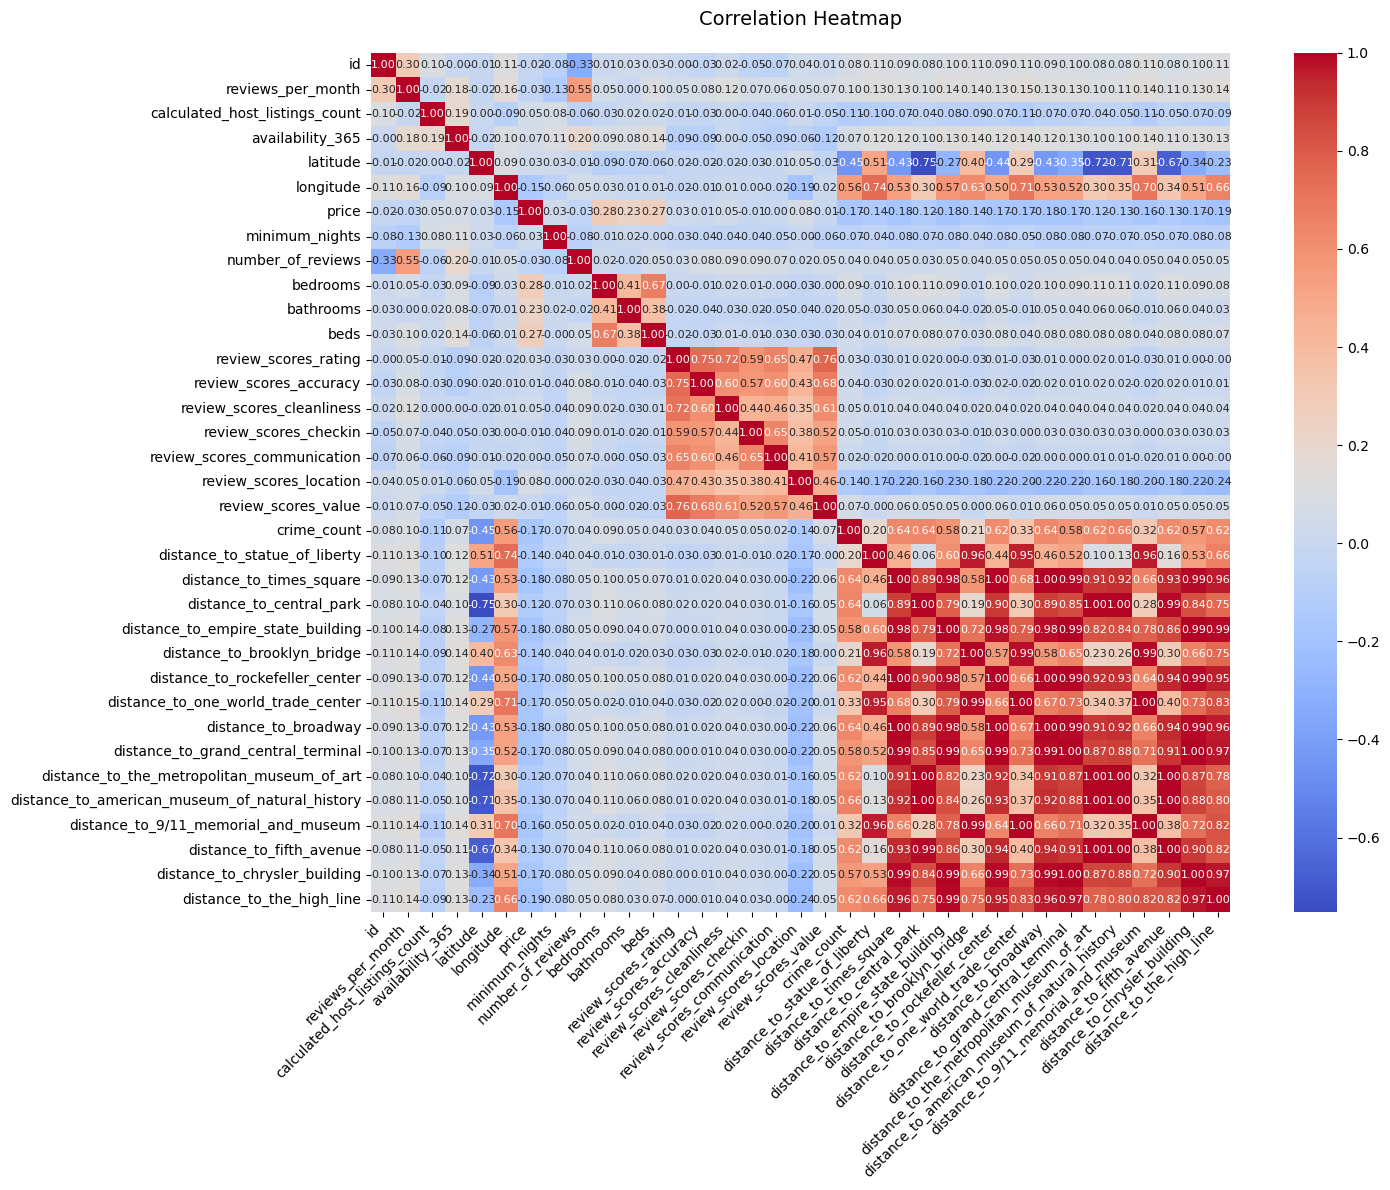

In [2]:
numeric_cols = airbnb_crime.select_dtypes(include=[np.number])

# Compute correlations
corr = numeric_cols.corr()

# Set up figure size
plt.figure(figsize=(16, 12))

# Plot heatmap
sns.heatmap(
    corr, 
    annot=True, 
    fmt=".2f",       # show 2 decimal places
    cmap="coolwarm", # color palette
    cbar=True, 
    square=True, 
    annot_kws={"size": 8}  # smaller font for annotations
)

# Rotate axis labels for clarity
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

plt.title("Correlation Heatmap", fontsize=14, pad=20)
plt.tight_layout()
plt.show()

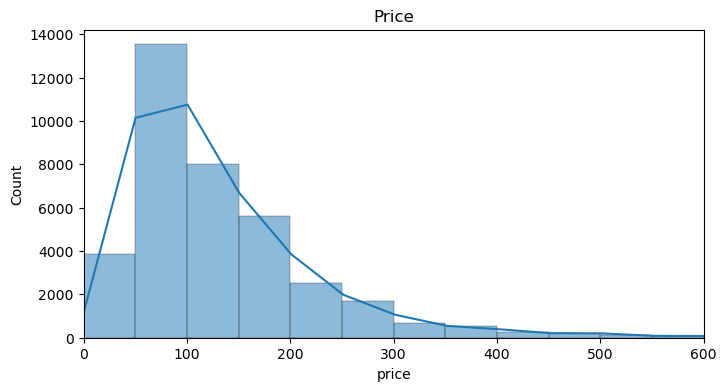

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(airbnb_crime['price'], bins=200, kde=True)
plt.xlim(0, 600)  
plt.title("Price")
plt.show()

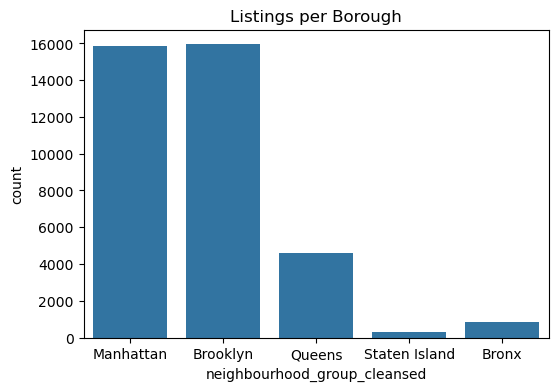

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(x='neighbourhood_group_cleansed', data=airbnb_crime)
plt.title("Listings per Borough")
plt.show()

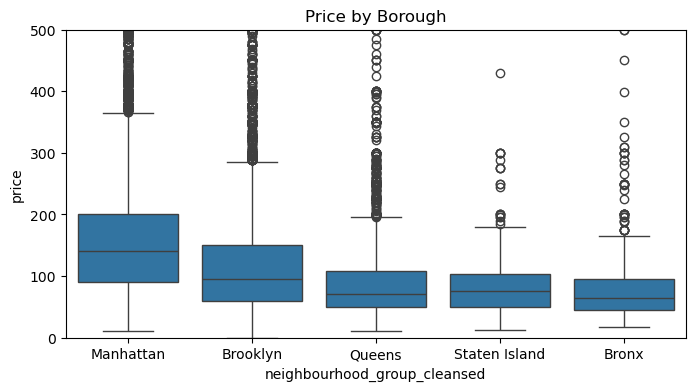

In [5]:
plt.figure(figsize=(8,4))
sns.boxplot(x='neighbourhood_group_cleansed', y='price', data=airbnb_crime)
plt.ylim(0, 500)
plt.title("Price by Borough")
plt.show()

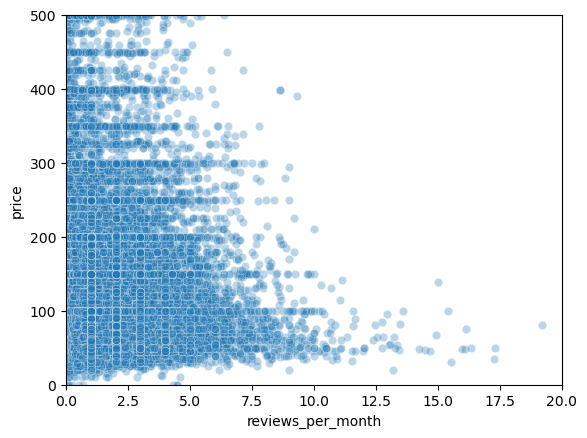

In [6]:
sns.scatterplot(x='reviews_per_month', y='price', data=airbnb_crime, alpha=0.3)
plt.ylim(0,500)
plt.xlim(0,20)
plt.show()

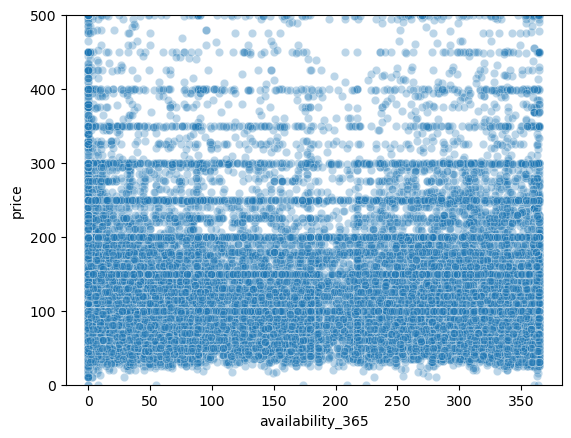

In [7]:
sns.scatterplot(x='availability_365', y='price', data=airbnb_crime, alpha=0.3)
plt.ylim(0,500)
plt.show()

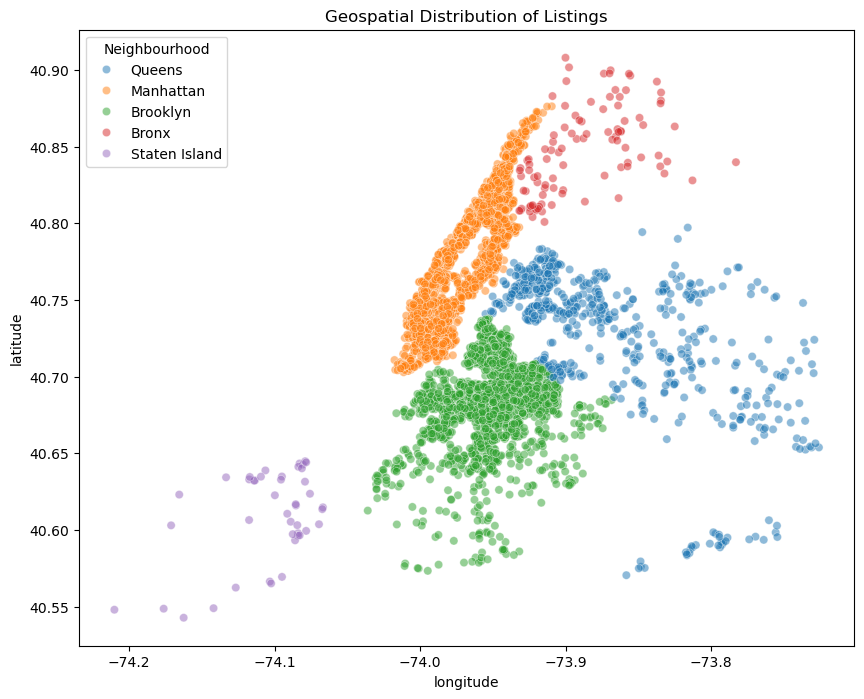

In [8]:
sample = airbnb_crime.sample(5000, random_state=42)
plt.figure(figsize=(10,8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group_cleansed', data=sample, alpha=0.5)
plt.title("Geospatial Distribution of Listings")
plt.legend(title="Neighbourhood")
plt.show()

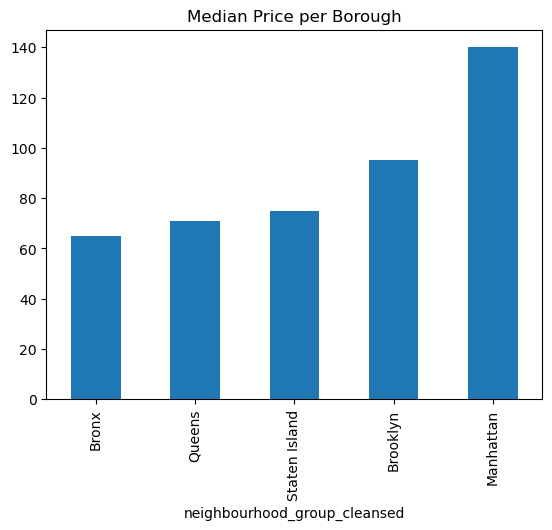

In [9]:
airbnb_crime.groupby('neighbourhood_group_cleansed')['price'].median().sort_values().plot(kind='bar')
plt.title("Median Price per Borough")
plt.show()

In [ ]:
airbnb_crime['neighbourhood_group_cleansed']

counts = airbnb_crime['neighbourhood_group_cleansed'].value_counts().reset_index()
counts.columns = ['neighbourhood_group_cleansed', 'Total']

counts['Percentage'] = (counts['Total'] / counts['Total'].sum()) * 100
print(counts)

  neighbourhood_group_cleansed  Total  Percentage
0                     Brooklyn  15951   42.419488
1                    Manhattan  15869   42.201420
2                       Queens   4591   12.209132
3                        Bronx    871    2.316305
4                Staten Island    321    0.853655


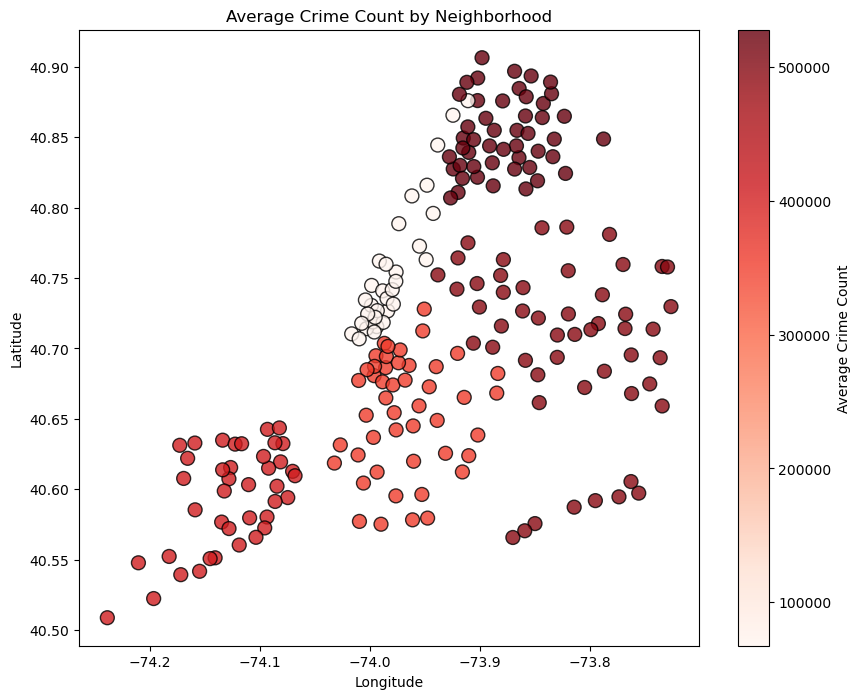

In [11]:
neighbourhood_crime = airbnb_crime.groupby('neighbourhood_cleansed', as_index=False).agg({
    'latitude':'mean',
    'longitude':'mean',
    'crime_count':'mean'
})

plt.figure(figsize=(10,8))
scatter = plt.scatter(
    neighbourhood_crime['longitude'],
    neighbourhood_crime['latitude'],
    c=neighbourhood_crime['crime_count'],
    cmap="Reds",
    s=100,    # marker size
    alpha=0.8,
    edgecolor="black"
)
plt.colorbar(scatter, label="Average Crime Count")
plt.title("Average Crime Count by Neighborhood")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

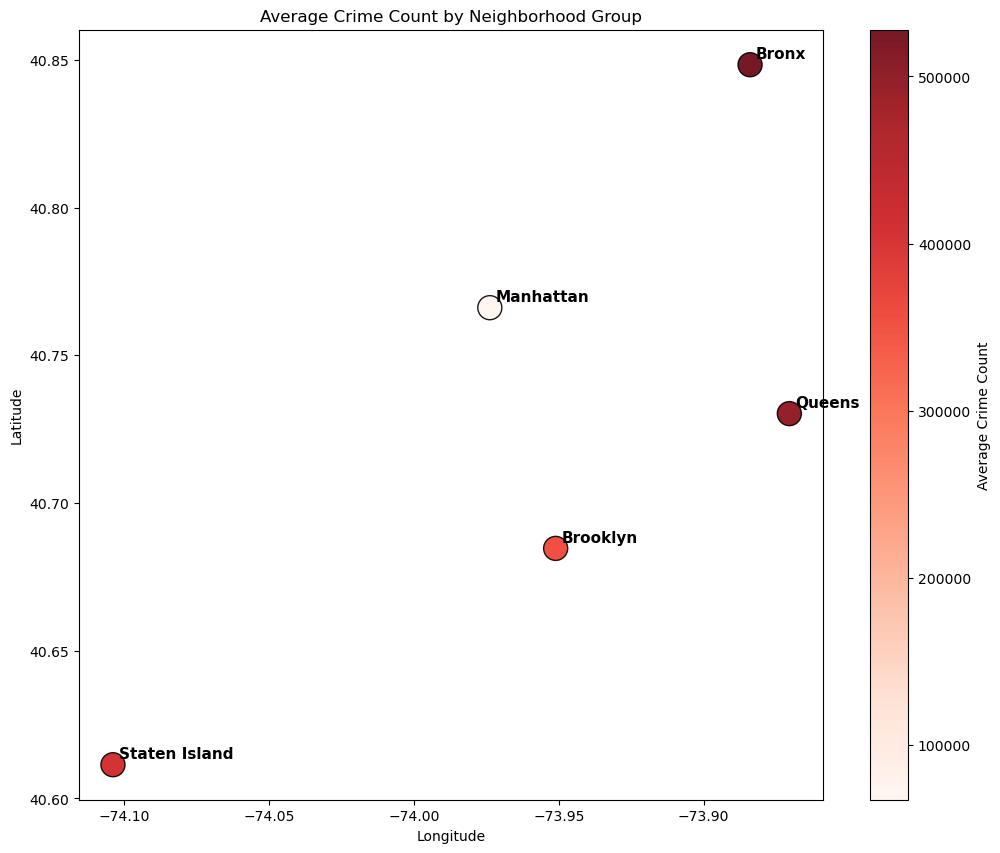

In [12]:
# Group by neighborhood group instead of individual neighborhoods
neighbourhood_group_crime = airbnb_crime.groupby('neighbourhood_group_cleansed', as_index=False).agg({
    'latitude':'mean',
    'longitude':'mean',
    'crime_count':'mean'
})

plt.figure(figsize=(12,10))
scatter = plt.scatter(
    neighbourhood_group_crime['longitude'],
    neighbourhood_group_crime['latitude'],
    c=neighbourhood_group_crime['crime_count'],
    cmap="Reds",
    s=300,   # larger markers for groups
    alpha=0.9,
    edgecolor="black"
)

# Add neighborhood group names
for i, row in neighbourhood_group_crime.iterrows():
    plt.text(
        row['longitude']+0.002,
        row['latitude']+0.002,
        row['neighbourhood_group_cleansed'],
        fontsize=11,
        fontweight="bold"
    )

plt.colorbar(scatter, label="Average Crime Count")
plt.title("Average Crime Count by Neighborhood Group")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

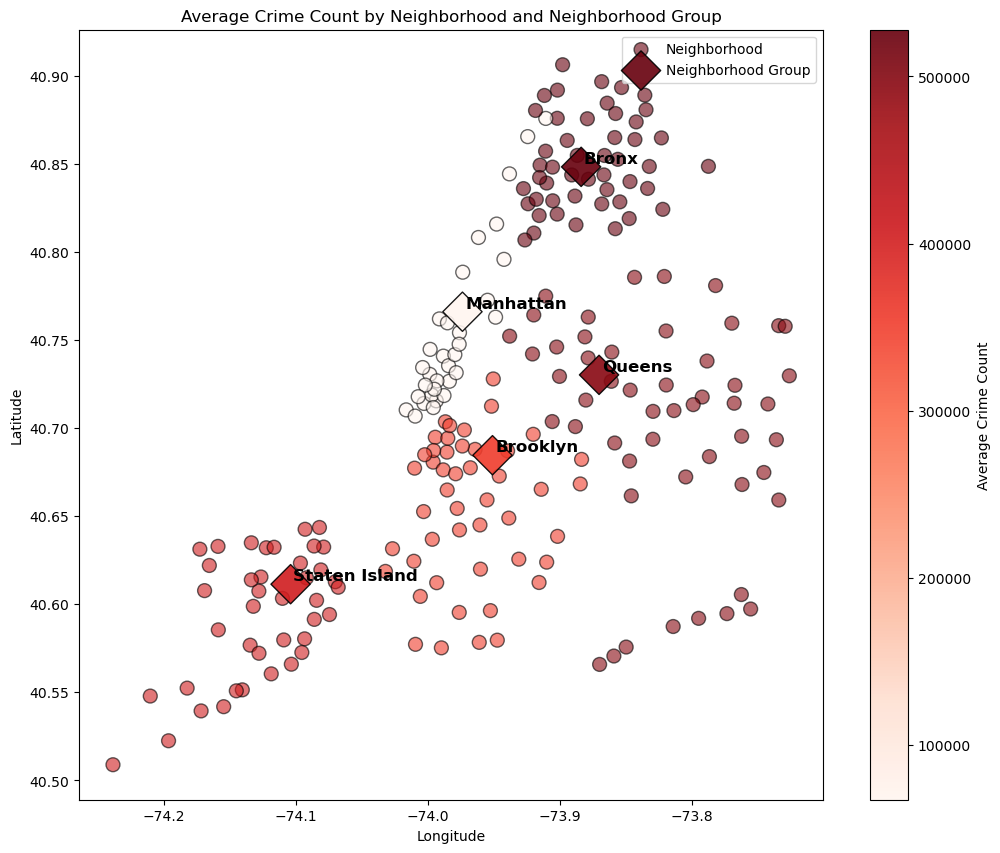

In [13]:
# Aggregate at neighborhood group level
neighbourhood_group_crime = airbnb_crime.groupby('neighbourhood_group_cleansed', as_index=False).agg({
    'latitude':'mean',
    'longitude':'mean',
    'crime_count':'mean'
})

# Aggregate at neighborhood level
neighbourhood_crime = airbnb_crime.groupby('neighbourhood_cleansed', as_index=False).agg({
    'latitude':'mean',
    'longitude':'mean',
    'crime_count':'mean'
})

plt.figure(figsize=(12,10))

# Plot neighborhood-level points (no labels)
plt.scatter(
    neighbourhood_crime['longitude'],
    neighbourhood_crime['latitude'],
    c=neighbourhood_crime['crime_count'],
    cmap="Reds",
    s=100,    # smaller markers
    alpha=0.6,
    edgecolor="black",
    label='Neighborhood'
)

# Plot neighborhood group-level points and add labels
plt.scatter(
    neighbourhood_group_crime['longitude'],
    neighbourhood_group_crime['latitude'],
    c=neighbourhood_group_crime['crime_count'],
    cmap="Reds",
    s=400,   # larger markers
    alpha=0.9,
    edgecolor="black",
    marker='D',   # diamond marker for group
    label='Neighborhood Group'
)

for i, row in neighbourhood_group_crime.iterrows():
    plt.text(row['longitude']+0.002, row['latitude']+0.002, row['neighbourhood_group_cleansed'],
             fontsize=12, weight='bold')

plt.colorbar(label="Average Crime Count")
plt.title("Average Crime Count by Neighborhood and Neighborhood Group")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()


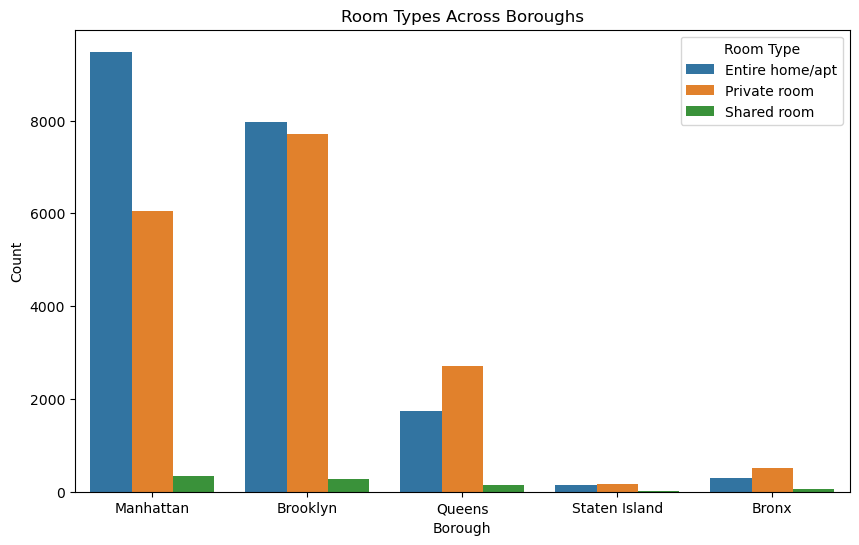

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='neighbourhood_group_cleansed', 
    hue='room_type', 
    data=airbnb_crime
)
plt.title("Room Types Across Boroughs")
plt.ylabel("Count")
plt.xlabel("Borough")
plt.legend(title="Room Type")
plt.show()

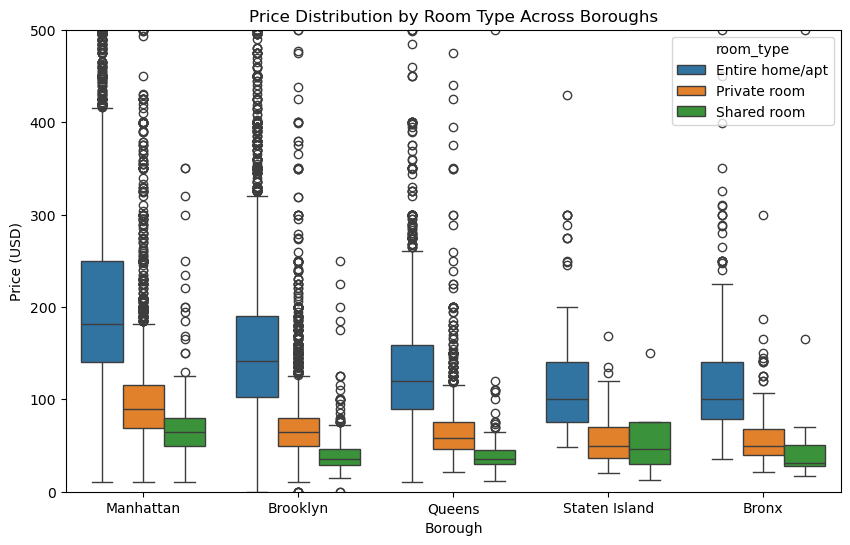

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='neighbourhood_group_cleansed',
    y='price',
    hue='room_type',
    data=airbnb_crime
)
plt.ylim(0,500)  # cap extreme outliers for readability
plt.title("Price Distribution by Room Type Across Boroughs")
plt.xlabel("Borough")
plt.ylabel("Price (USD)")
plt.show()

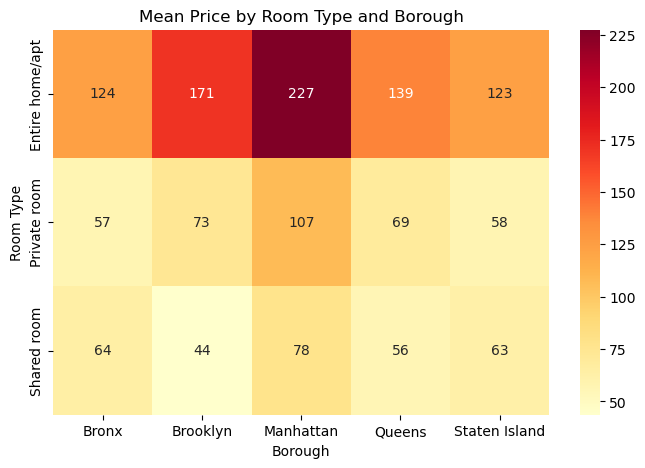

In [16]:
price_pivot = (
    airbnb_crime.groupby(['neighbourhood_group_cleansed','room_type'])['price']
    .mean()
    .unstack()
)

# Transpose to swap axes
price_pivot = price_pivot.T

plt.figure(figsize=(8,5))
sns.heatmap(price_pivot, annot=True, fmt=".0f", cmap="YlOrRd")
plt.title("Mean Price by Room Type and Borough")
plt.ylabel("Room Type")
plt.xlabel("Borough")
plt.show()

C:\Users\Naveen\AppData\Local\Temp\ipykernel_3320\2722755923.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


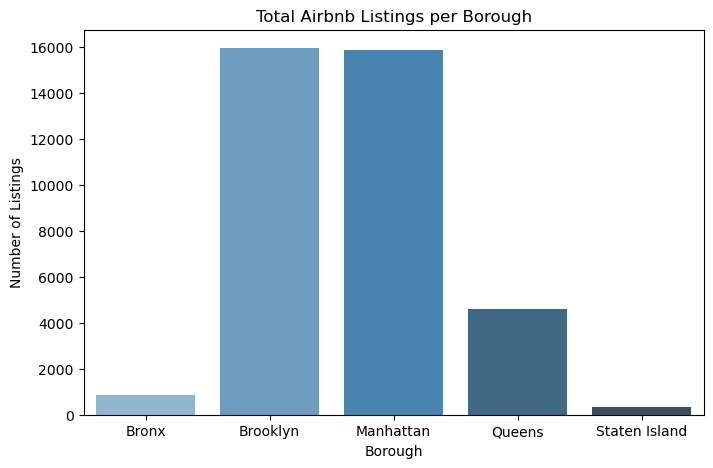

In [17]:
borough_summary = airbnb_crime.groupby('neighbourhood_group_cleansed').agg(
    total_listings=('id', 'count'),
    avg_crime=('crime_count', 'mean'),
    median_price=('price', 'median')
).reset_index()

plt.figure(figsize=(8,5))
sns.barplot(
    x='neighbourhood_group_cleansed', 
    y='total_listings', 
    data=borough_summary,
    palette="Blues_d"
)
plt.title("Total Airbnb Listings per Borough")
plt.ylabel("Number of Listings")
plt.xlabel("Borough")
plt.show()

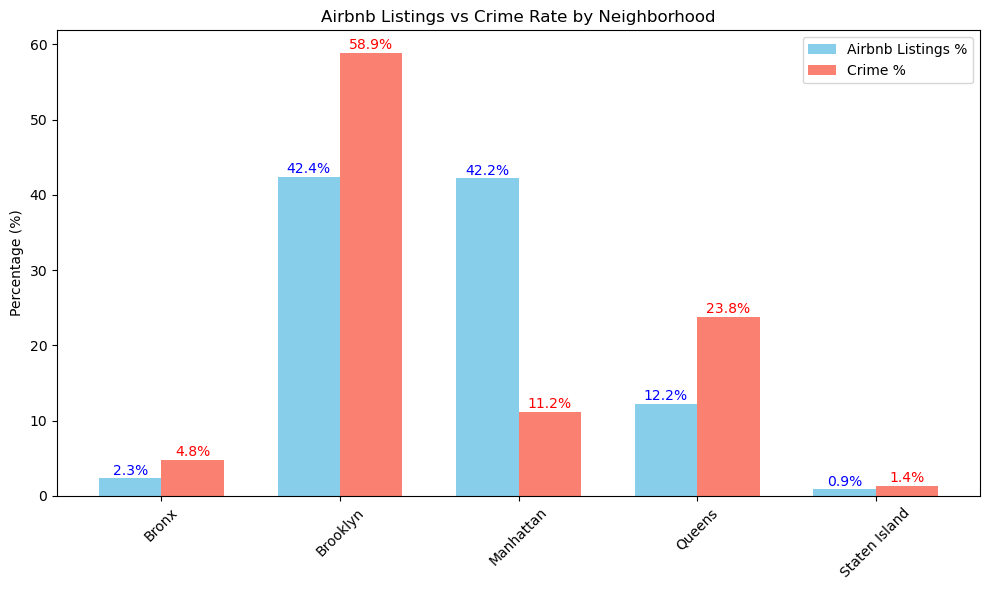

In [ ]:
# Aggregate data
crime_per_neigh = airbnb_crime.groupby('neighbourhood_group_cleansed')['crime_count'].sum().reset_index()
listings_per_neigh = airbnb_crime.groupby('neighbourhood_group_cleansed').size().reset_index(name='Listings')

# Merge datasets
merged = crime_per_neigh.merge(listings_per_neigh, on='neighbourhood_group_cleansed')
# Convert to percentages
merged['Crime_Percentage'] = (merged['crime_count'] / merged['crime_count'].sum()) * 100
merged['Listings_Percentage'] = (merged['Listings'] / merged['Listings'].sum()) * 100

# Bar chart
x = np.arange(len(merged['neighbourhood_group_cleansed']))
width = 0.35
plt.figure(figsize=(10,6))
plt.bar(x - width/2, merged['Listings_Percentage'], width, label='Airbnb Listings %', color='skyblue')
plt.bar(x + width/2, merged['Crime_Percentage'], width, label='Crime %', color='salmon')

# Add labels on top of bars
for i, row in merged.iterrows():
    plt.text(i - width/2, row['Listings_Percentage'] + 0.5, f"{row['Listings_Percentage']:.1f}%", ha='center', color='blue')
    plt.text(i + width/2, row['Crime_Percentage'] + 0.5, f"{row['Crime_Percentage']:.1f}%", ha='center', color='red')
plt.xticks(x, merged['neighbourhood_group_cleansed'], rotation=45)
plt.ylabel('Percentage (%)')
plt.title('Airbnb Listings vs Crime Rate by Neighborhood')
plt.legend()
plt.tight_layout()
plt.show()